# Unsupervised Learning with Linear Algebra

To view the source code, pelase follow this link: https://github.com/madgallop/madgallop.github.io/blob/main/posts/linear_regression_blog/linear_regression.py

## Introduction

### Unsupervised Learning and Dimensionality Reduction

In the following blog post, I  implement a simple machine learning approach for image compression and image segmentation. I will explore linear algebra methods (focusing on singluar value decomposition) for unsupervised learning using images. 

In machine learning, unsupervised learning refers to machine learning techniques in which we do not have a target matrix y cooresponding to our feature matrix X. Thus, unsupervised learning focuses on finding patterns in the features X instead of making predictions and validating them. 

Dimensionality reduction is a form of unsupervised learning in which we identify similar or related features (columns) in our feature matrix. 

Matrix factorization is one common approach to dimensionality reduction. In this approach, we wnat to write X&#x2248;UW where U and W are constrained matrices. These constraints include: $X \in R^{nxp}$, then we must have $U \in R^{nxk}$ and $W \in R^{kxp}$ for some k (the latent dimension) that is less than p. 

### Singular Value Decomposition (SVD)

SVD is an important and versitile technique for matrix factorization. 

For a real matrix $A \in R^{mxn}$, a singluar value decomposition is $A = UDV^{T}$ where $D \in R^{mx n}$ has nonzero entries only along the diagonal, and where $U \in R^{mxm}$ and $V \in R^{nxn}$ are orthogonal matrices. The nonzero entreis of D ($\sigma_i$) provide a measure for how "large matrix A is. 

Numpy makes computing SVD of a matrix easier: 

In [73]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(12345)

In [74]:
a_1 = np.random.randint(1, 3, (5, 3))
a_2 = np.random.randint(1, 3, (3, 7))

A = a_1 @ a_2 + 0.1*np.random.randn(5, 7)
A

array([[ 9.13529168, 10.08864293,  9.79983627,  7.96281575,  9.16690253,
         4.95614303,  6.94602586],
       [ 8.0476985 , 10.32489439,  9.89787725,  8.94229127,  8.01241213,
         5.03026136,  7.05237721],
       [ 7.00009403,  8.13438098,  7.9286456 ,  6.91688465,  6.76297683,
         3.81392392,  5.91392426],
       [ 9.05601453,  9.87340655, 10.01198271,  7.89364876,  9.03328827,
         4.76405812,  6.9800457 ],
       [ 8.84580045,  9.90292641,  9.86929697,  8.02863497,  9.03779841,
         4.92461135,  7.03312857]])

Now, we can visualize the matrix as an image: 

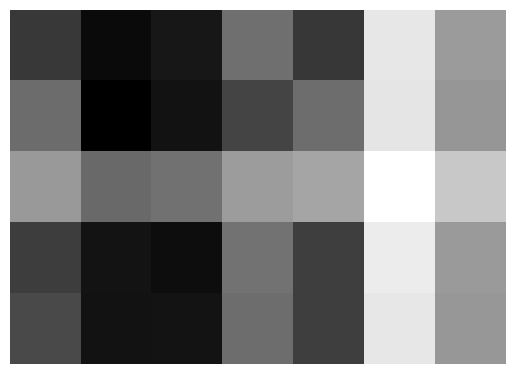

In [75]:
plt.imshow(A, cmap = "Greys")
a = plt.gca().axis("off")

Now, we can compute a singular value decomposition, where sigma is a numpy array (vector) that contains the singlular values of A:

In [76]:
U, sigma, V = np.linalg.svd(A)

Now, we can create a diagonal matrix using matrix multiplication with the elements of sigma.  

In [77]:
# create the D matrix in the SVD
D = np.zeros_like(A,dtype=float) # matrix of zeros of same shape as A
D[:min(A.shape),:min(A.shape)] = np.diag(sigma)        # singular values on the main diagonal
D

array([[47.92787806,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.59525638,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.35772778,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.23426796,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.15684841,
         0.        ,  0.        ]])

Now, we can reconstruct A:

In [78]:
U @ D @ V # == A up to numerical precision

array([[ 9.13529168, 10.08864293,  9.79983627,  7.96281575,  9.16690253,
         4.95614303,  6.94602586],
       [ 8.0476985 , 10.32489439,  9.89787725,  8.94229127,  8.01241213,
         5.03026136,  7.05237721],
       [ 7.00009403,  8.13438098,  7.9286456 ,  6.91688465,  6.76297683,
         3.81392392,  5.91392426],
       [ 9.05601453,  9.87340655, 10.01198271,  7.89364876,  9.03328827,
         4.76405812,  6.9800457 ],
       [ 8.84580045,  9.90292641,  9.86929697,  8.02863497,  9.03779841,
         4.92461135,  7.03312857]])

SVD lets us also approximate using smaller representations. To see this approximation, we can select the first k columns of U, the top k singular values of D, and the first k rows of V. 

If k=2: 

In [79]:
k = 2
U_ = U[:,:k]
D_ = D[:k, :k]
V_ = V[:k, :]

In [80]:
A_ = U_ @ D_ @ V_

Now, with this k value (that must be smaller than m and n, we can compare these results: 

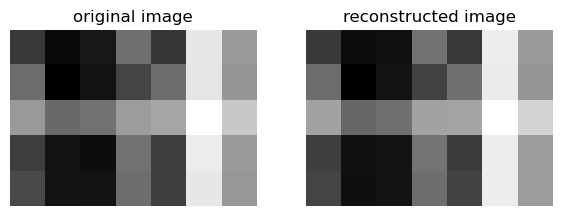

In [81]:
def compare_images(A, A_):

    fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

    axarr[0].imshow(A, cmap = "Greys")
    axarr[0].axis("off")
    axarr[0].set(title = "original image")

    axarr[1].imshow(A_, cmap = "Greys")
    axarr[1].axis("off")
    axarr[1].set(title = "reconstructed image")

compare_images(A, A_)

We can also try k=1: 

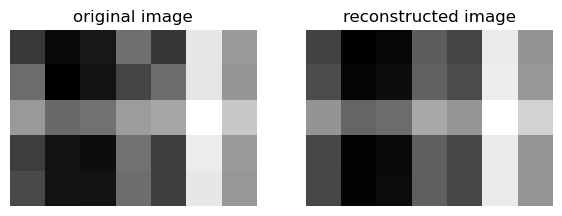

In [82]:
k = 1
U_ = U[:,:k]
D_ = D[:k, :k]
V_ = V[:k, :]
A_ = U_ @ D_ @ V_
compare_images(A, A_)

For both k values, the reconstructed image looks very similar to the original. 

## Application to Images

Let's employ a function to read an image from the internet and save it as a numpy array: 

In [83]:
import PIL
import urllib

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

I've selected an image of my favorite town in Colorado, Crested Butte. 

In [84]:
url = "https://images.fineartamerica.com/images-medium-large-5/colorful-crested-butte-dusty-demerson.jpg"

img = read_image(url)

We will first convert the image to greyscale: 

[Text(0.5, 1.0, 'greyscale')]

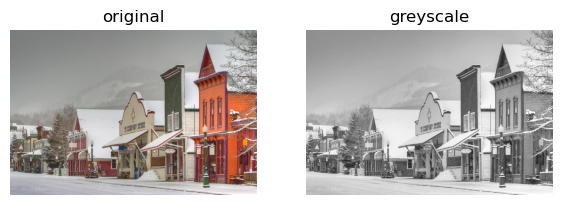

In [85]:
fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(img)

axarr[0].imshow(img)
axarr[0].axis("off")
axarr[0].set(title = "original")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "greyscale")

Let's find the size of the greyscale image: 

In [86]:
grey_img.shape 

(603, 900)

Now, we are ready to use our SVD pipeline to approximate this image through image compression. Image compression allows us to store  large images in a manner that takes up less space on hard drives with limited storage. 

## Implementation

Now, we will write a function svd_reconstruct that will reconstruct an image from its singular value decomposition. 

In [99]:
def svd_reconstruct(image, k): #take in the grayscale image and a value of k.
    n = image.shape[0]
    m = image.shape[1]
    
    #get U, sigma and V from svd
    U, sigma, V = np.linalg.svd(image)
    #create the diagonal matrix D
    D = np.zeros_like(image,dtype=float) # matrix of zeros of same shape as A
    D[:min(image.shape),:min(image.shape)] = np.diag(sigma)        # singular values on the main diagonal
    
    #reconstruct A from U D and V
    reconstructed_image =U @ D @ V # numerical precision
    
    U_ = U[:,:k]
    D_ = D[:k, :k]
    V_ = V[:k, :]

    image_ = U_ @ D_ @ V_
    
    compare_images(image,image_)
    
    return reconstructed_image


## Run some experiments

#### 1 component: 

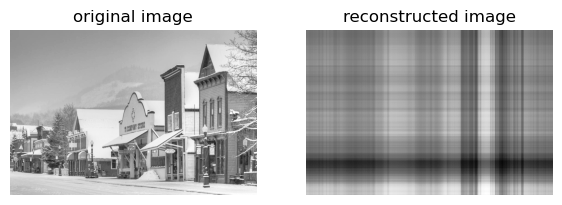

In [101]:
grey_img_reconstruct_1 = svd_reconstruct(grey_img, 1)

With 1 component, the image is extremely blurry and almost unrecognizable. 

#### 10 components: 

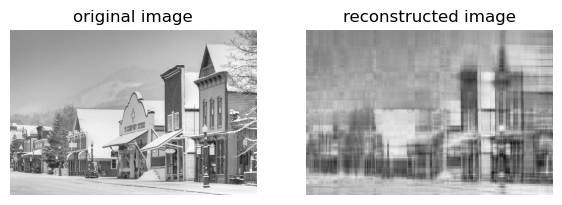

In [102]:
grey_img_reconstruct_10 = svd_reconstruct(grey_img, 10)

#### 100 components: 

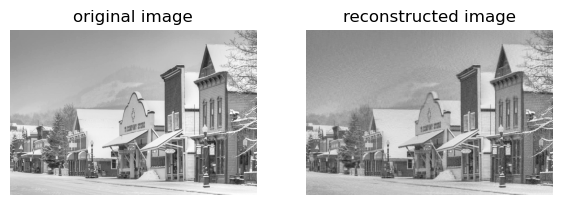

In [103]:
grey_img_reconstruct_100 = svd_reconstruct(grey_img, 100)

#### 100000 components: 

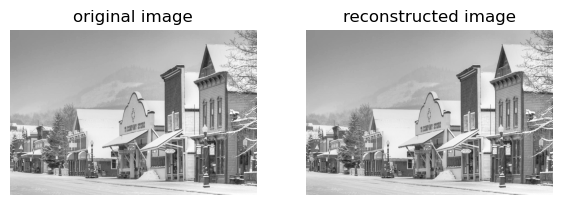

In [104]:
grey_img_reconstruct_100000 = svd_reconstruct(grey_img, 100000)

The smaller the number of components we have is, the more we have simplified our data, but, at the same time, small k values cause us to lose a lot of interesting structure and detail in the image that we might want to capture.

## Allow the user to specify a compression factor for compressing the image

In this example, the user does not know how many components k to use, but knows the amount of space the image will likely take up. Here, I allow the user to select a desired compression factor and then I calculate the number of components k to use based on this selection. 

Enter the factor by which to compress the image by: 


In [268]:
compression = float(input("Enter what factor to compress the image by: "))
print(compression)


Enter what percent to compress the image by:  20


20.0


Now, we can modify our reconstruction function to take in the compression factor instead of k

In [269]:
def svd_reconstruct_2(image, compression_factor):
    n = image.shape[0]
    m = image.shape[1]
    #calculate k from the compression factor. 
    k = round((n*m)/(n*compression_factor+m*compression_factor+compression_factor))
    #storing n and m, as well as the compression factor 
    
    #get U, sigma and V from svd
    U, sigma, V = np.linalg.svd(image)
    #create the diagonal matrix D
    D = np.zeros_like(image,dtype=float) # matrix of zeros of same shape as A
    D[:min(image.shape),:min(image.shape)] = np.diag(sigma)        # singular values on the main diagonal
    
    #reconstruct A from U D and V
    reconstructed_image =U @ D @ V # numerical precision
    
    U_ = U[:,:k]
    D_ = D[:k, :k]
    V_ = V[:k, :]

    image_ = U_ @ D_ @ V_
    print(str(k)+" components, % compressed = "+str(compression_factor))
    compare_images(image,image_)
    
    return reconstructed_image



Now, visualize the reconstructed images: 

18 components, % compressed = 20.0


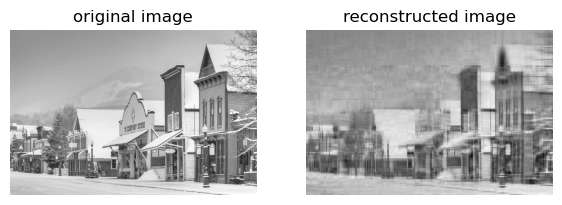

In [270]:
grey_img_reconstruct_1 = svd_reconstruct_2(grey_img, compression)

Let's experiment with more compression factors: 

#### Compressed by a factor of 0.1

3608 components, % compressed = 0.1


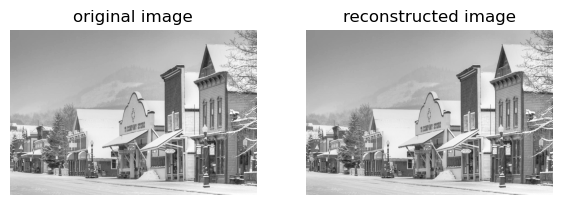

In [272]:
grey_img_reconstruct_1 = svd_reconstruct_2(grey_img, 0.1)

#### Compressed by a factor of 1

361 components, % compressed = 1


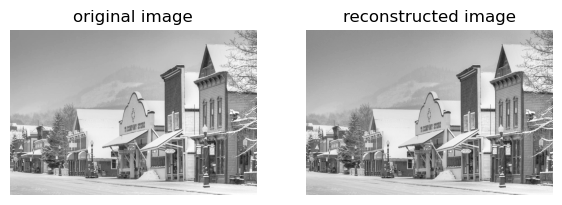

In [258]:
grey_img_reconstruct_1 = svd_reconstruct_2(grey_img, 1)

For a compression factor of 1, I still need 100% of the storage needed for the original image

#### Compressed by a factor of 10

36 components, % compressed = 10


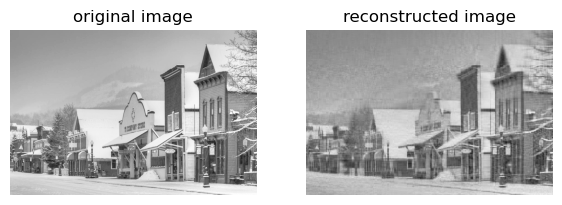

In [259]:
grey_img_reconstruct_1 = svd_reconstruct_2(grey_img, 10) 

For a compression factor of 10, I need 10% of the storage needed for the original iamge. 

#### Compressed by a factor of 100

4 components, % compressed = 100


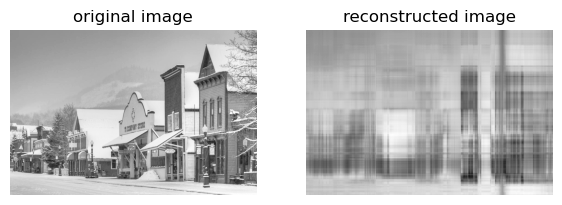

In [281]:
grey_img_reconstruct_1 = svd_reconstruct_2(grey_img, 100)

For a compression factor of 100, I need only 1% of the storage needed for the original image. 

As we can see in the above examples, as the compression factor increases, k (# of components) decreases. This means that the amount of storage needed for the image decreases as the compression factor increases. Fewer components k indicates that we need less storage for the image.

In this blog, we have learned how to compress image through controlling the number of components, and have seen the effects of compression on image storage. The blog provides an example of linear algebra methods for unsupervised learning with images. 